In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### 1. 데이터 살펴보기

In [36]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [38]:
int_var = train[['id', 'Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']]
obj_var = train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]
obj_var2 = [['Policy_Sales_Channel', 'Driving_License', 'Previously_Insured']]

In [8]:
int_var.describe()

,id,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.458210,30564.389581,154.347397
std,110016.836208,15.511611,0.498251,17213.155057,83.671304
min,1.000000,20.000000,0.000000,2630.000000,10.000000
25%,95278.000000,25.000000,0.000000,24405.000000,82.000000
50%,190555.000000,36.000000,0.000000,31669.000000,154.000000
75%,285832.000000,49.000000,1.000000,39400.000000,227.000000
max,381109.000000,85.000000,1.000000,540165.000000,299.000000


In [9]:
obj_var.describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [32]:
int_var = train[['id', 'Age', 'Annual_Premium', 'Vintage', 'Response']]
obj_var = train[['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Region_Code', 'Driving_License', 'Previously_Insured']]
for i in range(obj_var.shape[1]):
    category = np.unique(obj_var.iloc[:,i])
    print(f'{obj_var.columns[i]}: {category} ')

print(f"보험 미가입 고객 수: {len(train[train['Response']==0])}")
print(f"보험 가입 고객 수: {len(train[train['Response']==1])}")

Gender: ['Female' 'Male'] 
Vehicle_Age: ['1-2 Year' '< 1 Year' '> 2 Years'] 
Vehicle_Damage: ['No' 'Yes'] 
Policy_Sales_Channel: [  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  73.  74.  75.  76.  78.  79.  80.  81.  82.  83.  84.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130.
 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 143. 144. 145. 146.
 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160.
 163.] 
Region_Code: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 

### **Task1. 데이터 전처리**
- 결측치 X
- 연간 보험료 이상치 존재 -> 상한 및 하한 지정해서 이상치 제거

- 범주형 변수 라벨 인코딩
  - 연식은 3개로 분류: 크고 낮음이 존재
  - 나머지 두 변수: 이진 분류

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# 범주형 데이터 라벨인코딩
df = train.copy()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = encoder.fit_transform(df['Vehicle_Damage'])

In [49]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


- 보험 가입자가 적은 편향된 데이터

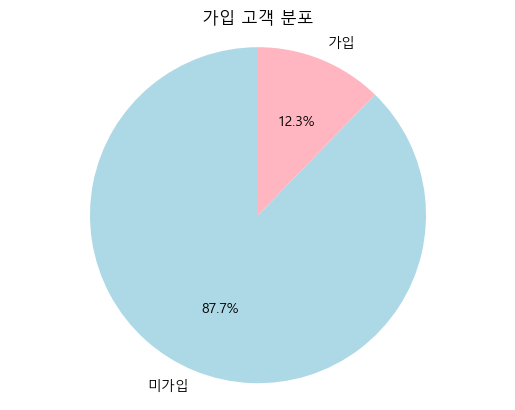

In [47]:
# 0과 1의 비율을 계산
sizes = [len(df[df['Response']==0]), len(df[df['Response']==1])]
labels = ['미가입', '가입']
# 원그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('가입 고객 분포')
plt.axis('equal')  # 원이 왜곡되지 않도록
plt.show()

- 이상치 제거
  - 이상치 갯수가 많은 비율을 차지하지 않고, 너무 크게 치우친 값이라 삭제 

In [94]:
cost = df["Annual_Premium"]
q1 = cost.quantile(0.25)
q3 = cost.quantile(0.75)

IQR = q3 - q1

lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

outliers = df[(cost < lower) | (cost > upper)]
print(f'lower bound : {lower}, upper bound: {upper} \n 이상치 개수: {len(outliers)}, 이상치 비율 = {round(len(outliers)/len(df), 2)}')

# 이상치 제거 : 상한 및 하한 설정
filtered = df[(cost >= lower) & (cost <= upper)]

lower bound : 1912.5, upper bound: 61892.5 
 이상치 개수: 10320, 이상치 비율 = 0.03


### **Task2. 피처 엔지니어링**

- 새로운 파생변수
|변수명|정의| 설명 |
|----------|------------------------|----------------------------------------------|
|Age_Premium|Annual_Premium/Age <br> 보험료 대비 나이 비율| - 나이에 따른 보험료 변화 경향을 파악하기 위한 변수 <br> - 나이가 많을수록 보험료가 높은 보험료 자체의 특성상 두 변수를 함께 살펴볼 수 있는 변수의 필요성이 있다고 판단|
|Vintage_Year|고객 지속 기간| - 지속 일수를 기준으로 0-100일, 101-200일, 201-300일 3개의 범주로 구분 <br> - 지속 일수 데이터 자체로는 큰 의미가 없다고 생각|

In [95]:
filtered['Age_Premium'] = filtered['Annual_Premium']/filtered['Age']

In [96]:
bins = [0, 100, 200, 300]
labels = [0,1,2]
filtered['Vintage_Long'] = pd.cut(df['Vintage'], bins = bins, labels = labels, right = False)

In [97]:
filtered.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Premium,Vintage_Long
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,919.409091,2
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,441.263158,1
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,814.765957,0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,1362.809524,2
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,948.137931,0


- 표준화

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = filtered.copy()
scaled[['Age', 'Annual_Premium', 'Vintage', 'Age_Premium']] = scaler.fit_transform(scaled[['Age', 'Annual_Premium', 'Vintage', 'Age_Premium']])

In [99]:
data = scaled[['Gender', 'Age', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Age_Premium', 'Vintage_Long', 'Response']]

- 최종 데이터

In [100]:
data.head()

,Gender,Age,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Age_Premium,Vintage_Long,Response
0,1,0.345182,2,1,0.758959,0.748826,0.083977,2,1
1,1,2.417701,0,0,0.289720,0.342470,-0.799130,1,0
2,1,0.539480,2,1,0.612449,-1.521990,-0.109293,0,1
3,1,-1.144442,1,0,-0.043793,0.581503,0.902912,2,0
4,0,-0.626312,1,0,-0.119965,-1.378570,0.137038,0,0


### 이전 EDA

|변수명|정의| 설명 |
|----------|----------------|----------------------------------------------|
|Age|나이|- 20대~90대로 구분 <br> - 보험 가입 여부에 따른 분포가 다름|
|Annual_Premium|연간 보험료| - 이상치가 1만개 정도 되는편 -> 삭제 <br> - 2630이 꽤 많은 편|
|Vintage|고객 지속 기간|- 날짜로는 큰 의미가 없어 보여 범주화로 구분(0,1,2)|

In [106]:
print(f"{len(filtered[filtered['Annual_Premium'] == 2630])}, {len(filtered[filtered['Annual_Premium'] < 10000])}")

64877, 64882


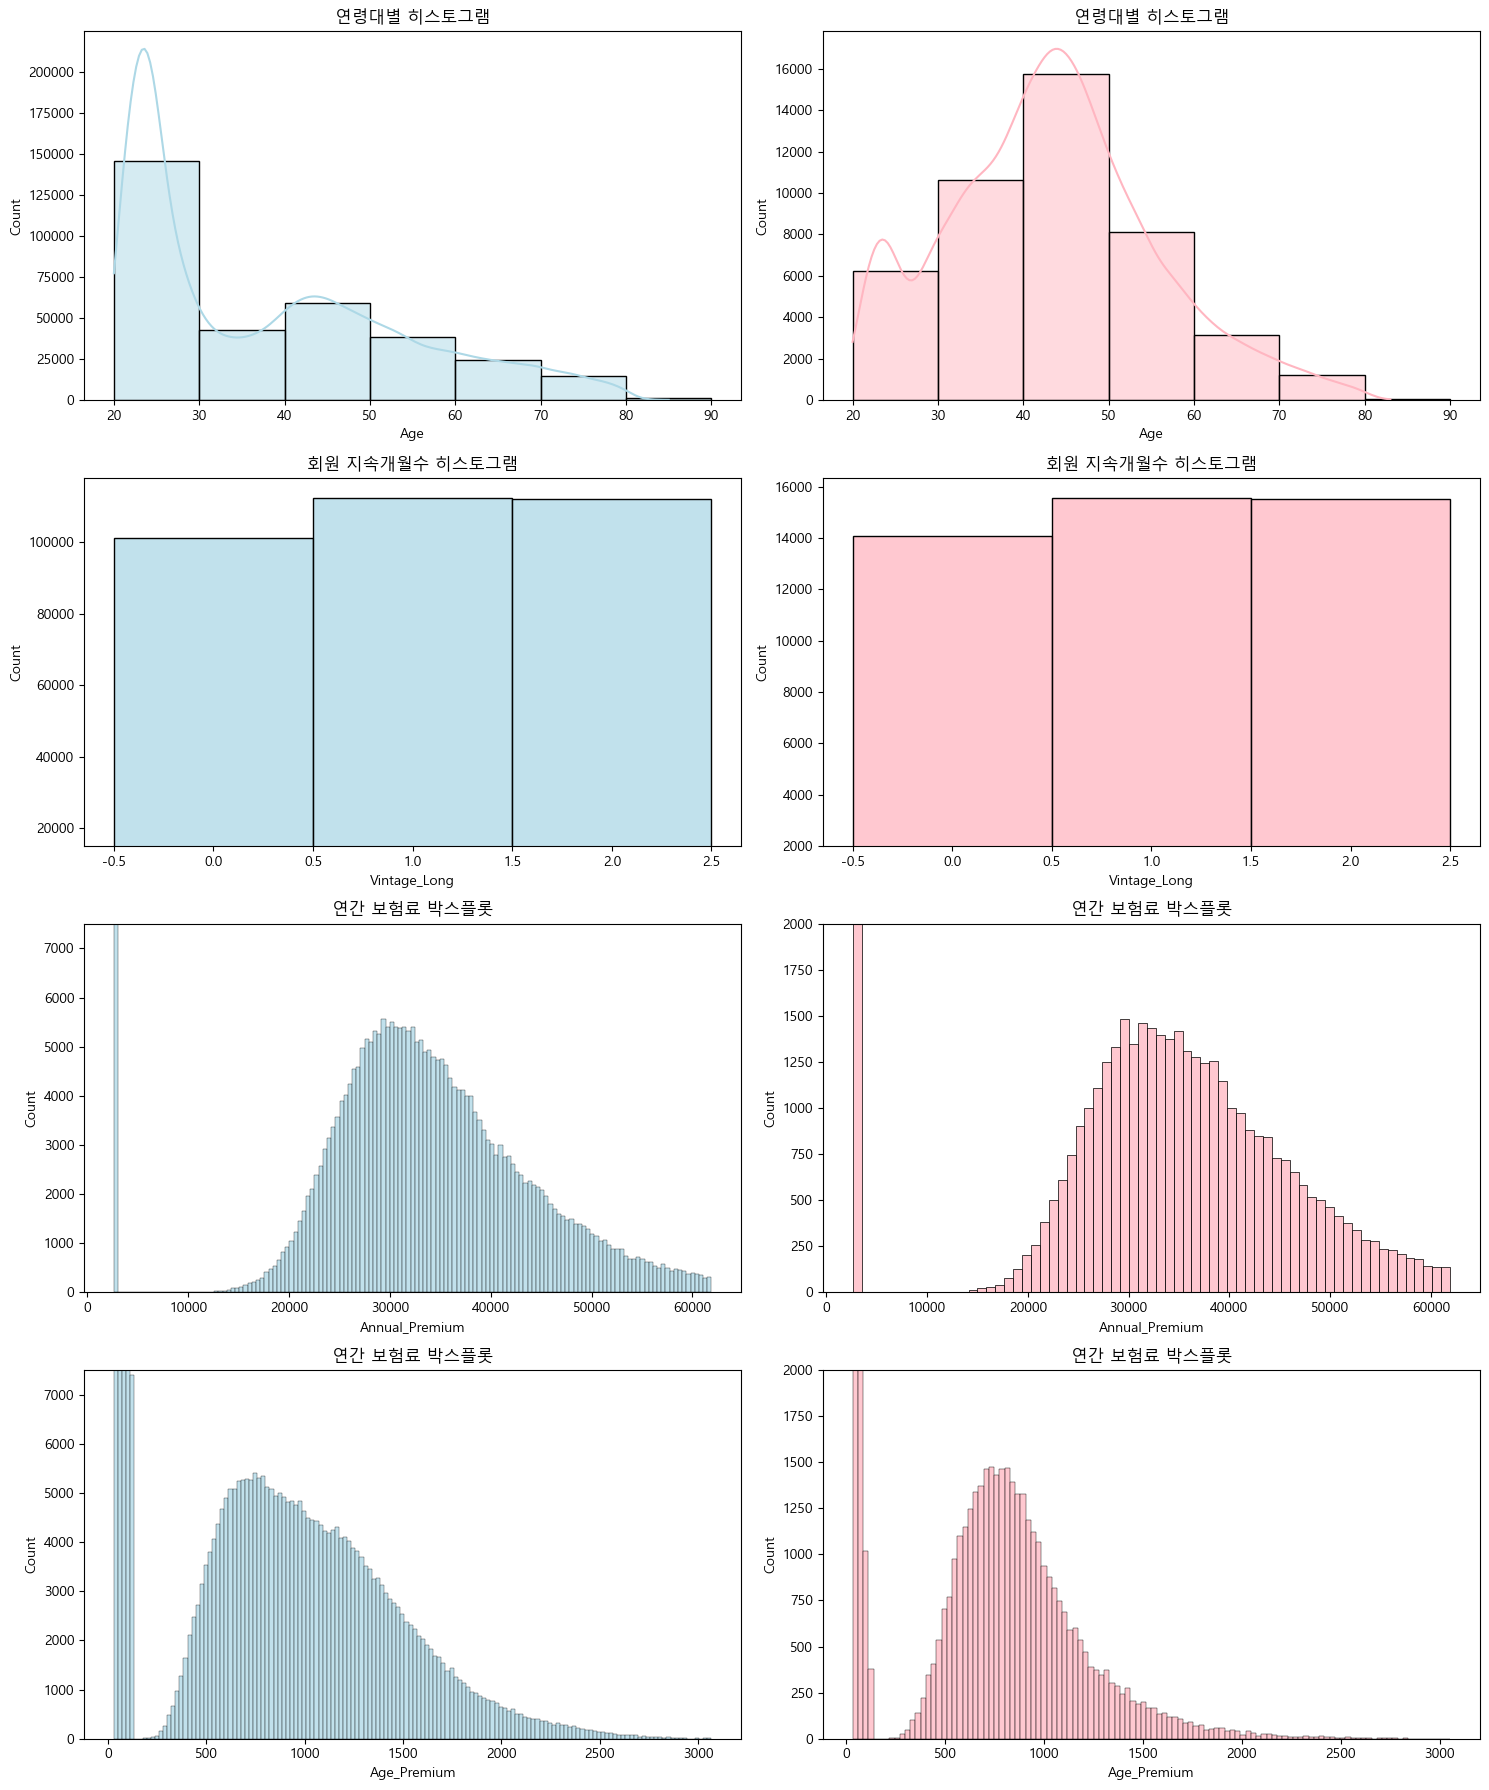

In [105]:
response_values = filtered['Response'].unique()

fig, axes = plt.subplots(4, 2, figsize=(15, 18))

# 연령 히스토그램
sns.histplot(filtered[filtered['Response'] == 0]['Age'], kde=True, bins=bin1, ax=axes[0, 0], label='Response 0', color = 'lightblue')
axes[0, 0].set_title('연령대별 히스토그램')

sns.histplot(filtered[filtered['Response'] == 1]['Age'], kde=True, bins=bin1, ax=axes[0, 1], label='Response 1', color = 'lightpink')
axes[0, 1].set_title('연령대별 히스토그램')

# 회원 지속 개월 수 박스플롯
sns.histplot(filtered[filtered['Response'] == 0]['Vintage_Long'], bins=bin2, ax=axes[1, 0], label='Response 0', color = 'lightblue')
axes[1, 0].set_title('회원 지속개월수 히스토그램')
axes[1, 0].set_ylim(15000,)

sns.histplot(filtered[filtered['Response'] == 1]['Vintage_Long'], bins=bin2, ax=axes[1, 1], label='Response 1', color = 'lightpink')
axes[1, 1].set_title('회원 지속개월수 히스토그램')
axes[1, 1].set_ylim(2000,)

# 연간 보험료 박스플롯
sns.histplot(filtered[filtered['Response'] == 0]['Annual_Premium'], ax=axes[2, 0], label='Response 0', color = 'lightblue')
axes[2, 0].set_title('연간 보험료 박스플롯')
axes[2, 0].set_ylim(bottom=None, top=7500)

sns.histplot(filtered[filtered['Response'] == 1]['Annual_Premium'], ax=axes[2, 1], label='Response 1', color = 'lightpink')
axes[2, 1].set_title('연간 보험료 박스플롯')
axes[2, 1].set_ylim(bottom=None, top=2000)

# 연간 보험료 박스플롯
sns.histplot(filtered[filtered['Response'] == 0]['Age_Premium'], ax=axes[3, 0], label='Response 0', color = 'lightblue')
axes[3, 0].set_title('연간 보험료 박스플롯')
axes[3, 0].set_ylim(bottom=None, top=7500)

sns.histplot(filtered[filtered['Response'] == 1]['Age_Premium'], ax=axes[3, 1], label='Response 1', color = 'lightpink')
axes[3, 1].set_title('연간 보험료 박스플롯')
axes[3, 1].set_ylim(bottom=None, top=2000)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

### 3. 범주형 변수